In [19]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy, AUC, Accuracy
from tensorflow.keras.applications import ResNet50V2

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
# Define information about training images 
training_generator = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        rotation_range=15,
        width_shift_range=0.05,
        height_shift_range=0.05,
)
# Imported training images with specific requirements
training_iterator = training_generator.flow_from_directory(
                          'train',
                          class_mode = "categorical",
                          color_mode = 'grayscale',
                          target_size = (256,256),
                          batch_size = 32,
                          shuffle=True,
                          seed=42,
                        )

# Define information about test images 
test_generator = ImageDataGenerator(rescale=1./255)
# Imported testimages with specific requirements
test_iterator=test_generator.flow_from_directory('test')


Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


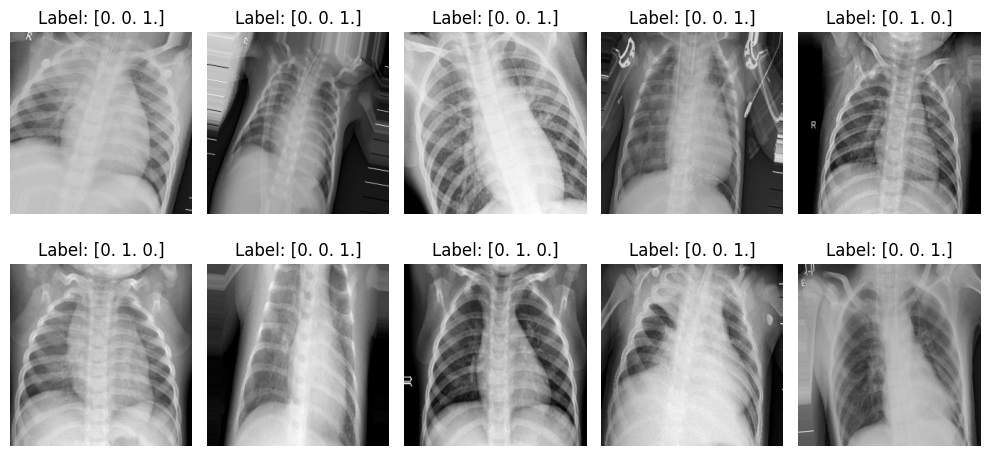

In [21]:
# Get the first batch of images and labels from the iterator
images, labels = training_iterator.next()

# Create a figure with 10 subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))

# Display the first 10 images in the batch
for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f"Label: {labels[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
def plotting_accuracy(history):
    
    print("training_accuracy", round(history.history['accuracy'][-1]*100,4))
    print("validation_accuracy", round(history.history['val_accuracy'][-1]*100,4))
    # plotting categorical and validation accuracy over epochs
    fig = plt.figure()
    ax1 = fig.add_subplot(2, 1, 1)
    ax1.plot(history.history['categorical_accuracy'])
    ax1.plot(history.history['val_categorical_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.grid()
    ax1.legend(['train', 'validation'], loc='upper left')

    # used to keep plots from overlapping
    fig.tight_layout()
    
def plotting_loss(history):
    # plotting categorical and validation accuracy over epochs
    fig = plt.figure()
    ax1 = fig.add_subplot(2, 1, 1)
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend(['train', 'validation'], loc='upper left')

    # used to keep plots from overlapping
    fig.tight_layout()

def evaluation_metrics(model_type):
    
    classes = ["COVID19", "NORMAL", "PNEUMONIA"]

    y_pred = model_type.predict(validation_iterator)
    y_pred = np.argmax(y_pred, axis=1)
    true_classes = test_iterator.classes
    # class_labels = list(validation_iterator.class_indices.keys())
    
    cm = pd.DataFrame(confusion_matrix(true_classes, y_pred), columns=classes, index=classes)
    plt.figure(figsize=(9, 6))
    ax = sns.heatmap(cm, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
    ax.set_xlabel('Predicted',fontsize = 20, weight = 'bold')
    ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

    ax.set_ylabel('Actual',fontsize = 20, weight = 'bold') 
    ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
    ax.set_title('Confusion Matrix - Test Set',fontsize = 25,weight = 'bold',pad=20);
   
    print('Classification Report')
    print(classification_report(true_classes, y_pred))

In [ ]:
# plotting categorical and validation accuracy over epochs
es = EarlyStopping(monitor='categorical_accuracy', mode='min', verbose=1, patience=10)

In [24]:
# Create Model
def design_model_1(training_data):

    model_1 = Sequential()
    # Input Layer
    model_1.add(Input(shape=(256,256,1)))
    # Flatten Layer
    model_1.add(Flatten())
    # Output Layer
    model_1.add(Dense(3, activation='softmax'))
    
    print("\nCompiling model...")
    model_1.compile(optimizer=Adam(learning_rate=.001), loss=CategoricalCrossentropy(), metrics=[CategoricalAccuracy(),AUC()],)
    # Summary report 
    model_1.summary()
    
    return model_1
    
model_1 = design_model_1(training_iterator)


Compiling model...
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense_2 (Dense)             (None, 3)                 196611    
                                                                 
Total params: 196,611
Trainable params: 196,611
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model
history_1 = model_1.fit(
    training_iterator,
    steps_per_epoch=len(training_iterator),
    epochs=20,
    validation_data=validation_iterator,
    validation_steps=len(validation_iterator),
    callbacks=[es]
)

Epoch 1/20
161/161 [==============================] - 134s 827ms/step - loss: 2.0273 - categorical_accuracy: 0.7076 - auc: 0.8569
Epoch 2/20
161/161 [==============================] - 109s 675ms/step - loss: 1.0182 - categorical_accuracy: 0.7774 - auc: 0.9085
Epoch 3/20
161/161 [==============================] - 108s 671ms/step - loss: 1.8795 - categorical_accuracy: 0.7358 - auc: 0.8629
Epoch 4/20
161/161 [==============================] - 112s 693ms/step - loss: 1.2576 - categorical_accuracy: 0.7895 - auc: 0.9033
Epoch 5/20
161/161 [==============================] - 109s 676ms/step - loss: 1.4716 - categorical_accuracy: 0.7665 - auc: 0.8885
Epoch 6/20
161/161 [==============================] - 133s 829ms/step - loss: 1.8258 - categorical_accuracy: 0.7685 - auc: 0.8787
Epoch 7/20
161/161 [==============================] - 115s 713ms/step - loss: 1.6584 - categorical_accuracy: 0.7788 - auc: 0.8904
Epoch 8/20
161/161 [==============================] - 113s 702ms/step - loss: 1.4026 - cat

In [ ]:
plotting_accuracy(history_1)

In [ ]:
plotting_loss(history_1)

In [ ]:
evaluation_metrics(model_1)

In [ ]:
def design_model_2(training_data):
    # sequential model
    model_2 = Sequential()
    # add input layer with grayscale image shape
    model_2.add(Input(shape=(256, 256, 1)))
    # convolutional hidden layers with relu functions
    # maxpooling layers and dropout layers as well
    model_2.add(Conv2D(5, 5, strides=3, activation="relu")) 
    model_2.add(MaxPooling2D(
        pool_size=(2, 2), strides=(2,2)))
    model_2.add(Dropout(0.1))
    model_2.add(Conv2D(3, 3, strides=1, activation="relu")) 
    model_2.add(MaxPooling2D(
        pool_size=(2, 2), strides=(2,2)))
    model_2.add(Dropout(0.2))

    model_2.add(Flatten())
    # output layer with softmax activation function
    model_2.add(Dense(3,activation="softmax"))
    # compile model with Adam optimizer
    # loss function is categorical crossentropy
    # metrics are categorical accuracy and AUC
    print("\nCompiling model...")
    model_2.compile(optimizer=Adam(learning_rate=.001), loss=CategoricalCrossentropy(), metrics=[CategoricalAccuracy(),AUC()],)
    # summarize model
    model_2.summary()
    return model_2

# use model function
model_2 = design_model_2(training_iterator)

In [ ]:
# training the model
history_2 = model_2.fit(
    training_iterator,
    steps_per_epoch=len(training_iterator),
    epochs=20,
    validation_data=validation_iterator,
    validation_steps=len(validation_iterator),
    callbacks=[es]
)

In [ ]:
plotting_accuracy(history_2)

In [ ]:
plotting_loss(history_2)

In [ ]:
evaluation_metrics(model_2)

In [ ]:
def design_model_3(training_data):
    
    base_model =ResNet50V2(include_top=False,weights='imagenet',input_shape=(128, 128, 3))
    
        # Freeze the weights of the base model so that they are not updated during training
    for layer in base_model.layers:
        layer.trainable = False
    
    # sequential model
    model_3 = Sequential()
    model_3.add(base_model)
    model_3.add(GlobalAveragePooling2D())
    model_3.add(Dense(256, activation='relu'))
    model_3.add(Dropout(0.5))
    model_3.add(Dense(3, activation='softmax'))

  
    print("\nCompiling model...")
    model_3.compile(optimizer=Adam(learning_rate=.001), loss=CategoricalCrossentropy(), metrics=[CategoricalAccuracy()],)
    # summarize model
    model_3.summary()
    return model_3

# use model function
model_3 = design_model_3(training_iterator)

In [ ]:
history_3 = model_3.fit(
    training_iterator,
    steps_per_epoch=len(training_iterator),
    epochs=20,
    validation_data=validation_iterator,
    validation_steps=len(validation_iterator),
    callbacks=[es]
)

In [ ]:
plotting_accuracy(history_3)

In [ ]:
plotting_loss(history_3)

In [ ]:
evaluation_metrics(model_3)

In [ ]:
model_1.save('models_1_fol','model_1.h5')
model_2.save('models_2_fol','model_2.h5')
model_3.save('models_3_fol','model_3.h5')